In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importing Data in Python & Exploring it 

In [3]:

data = pd.read_excel("cars_Data_full.xlsx",keep_default_na=False)

#display(data.head(4).transpose())
#display(data.tail(3).transpose())
data.head()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000,26,31463,Petrol,195,0,Silver,0,1800,3,...,1,0,1,1,1,1,0,0,1,0
1,20000,23,43612,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
2,19650,26,32191,Petrol,195,0,Red,0,1800,3,...,1,1,0,1,1,1,0,1,1,0
3,21550,32,23002,Petrol,195,1,Black,0,1800,3,...,1,1,1,1,1,1,0,1,1,0
4,22550,33,34133,Petrol,195,1,Grey,0,1800,3,...,1,1,1,1,1,1,0,1,1,0


In [3]:
data.shape


(1367, 28)

Dataset is having 28 columns & 1367 rows

In [5]:
data.Fuel.unique()

array(['Petrol', 'Diesel'], dtype=object)

Two types of Fuel & we will be converting it integer for materical calculation


All Columns list 

In [6]:
data.columns

Index(['Price', 'Age', 'KM', 'Fuel', 'HP', 'MC', 'Color', 'Auto', 'CC', 'Drs',
       'Cyl', 'Grs', 'Wght', 'G_P', 'Mfr_G', 'ABS', 'Abag_1', 'Abag_2', 'AC',
       'Comp', 'CD', 'Clock', 'Pwin', 'PStr', 'Radio', 'SpM', 'M_Rim',
       'Tow_Bar'],
      dtype='object')

In [7]:
data.describe()

,Price,Age,KM,HP,MC,Auto,CC,Drs,Cyl,Grs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.0,1367.000000,...,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,10682.416971,57.656913,68605.495245,104.464521,0.671544,0.057791,1574.811266,4.036576,3.0,5.027798,...,0.055596,0.281639,0.211412,0.574250,0.555230,0.977323,0.145574,0.304316,0.199707,0.280176
std,3555.986256,18.043061,36797.747240,14.918030,0.469824,0.233433,432.544394,0.953598,0.0,0.181388,...,0.229224,0.449963,0.408459,0.494637,0.497122,0.148927,0.352808,0.460286,0.399927,0.449249
min,4400.000000,5.000000,3.000000,72.000000,0.000000,0.000000,1300.000000,2.000000,3.0,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8500.000000,47.000000,43002.000000,89.000000,0.000000,0.000000,1400.000000,3.000000,3.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9945.000000,62.000000,64002.000000,113.000000,1.000000,0.000000,1600.000000,4.000000,3.0,5.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11800.000000,71.000000,87180.500000,113.000000,1.000000,0.000000,1600.000000,5.000000,3.0,5.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,32550.000000,81.000000,232942.000000,195.000000,1.000000,1.000000,16000.000000,5.000000,3.0,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Coverting colors in numerical value

In [22]:
data.Color.unique()
data.replace({'Color':{'Silver': 0, 'Red':1,
'Black': 2, 'Grey':3,
'Blue': 4, 'Green':5,
'White': 6, 'Yellow':7 }}, inplace=True)

In [23]:
data.iloc[:,[0,1,2,3,4,6,8,12,18,19]]

,Price,Age,KM,Fuel,HP,Color,CC,Wght,AC,Comp
0,21000,26,31463,0,195,0,1800,1189,1,0
1,20000,23,43612,0,195,1,1800,1189,1,1
2,19650,26,32191,0,195,1,1800,1189,1,1
3,21550,32,23002,0,195,2,1800,1189,1,1
4,22550,33,34133,0,195,3,1800,1189,1,1
...,...,...,...,...,...,...,...,...,...,...
1362,7550,70,20546,0,89,4,1300,1029,0,0
1363,10895,73,19002,0,89,3,1300,1019,0,0
1364,8550,72,17018,0,89,4,1300,1019,0,0
1365,7300,71,16918,0,89,3,1300,1019,0,0


for correlation converting Petrol to 0 and Diesel to 1 

In [4]:
data.replace({'Fuel':{'Petrol': 0, 'Diesel':1}}, inplace=True)


Text(0.5, 1.0, 'Correlation between Columns')

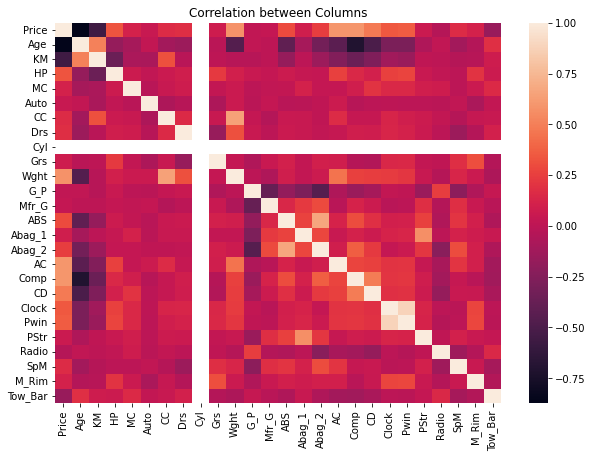

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(data.iloc[:,:].corr(), annot=False)
plt.title('Correlation between Columns')


Text(0.5, 1.0, 'Correlation between specific Columns')

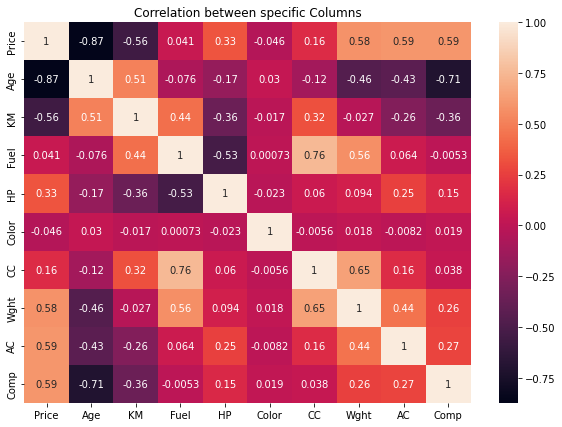

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap( data.iloc[:,[0,1,2,3,4,6,8,12,18,19]].corr(), annot=True)
plt.title('Correlation between specific Columns')


<AxesSubplot: title={'center': 'Correlation between HP & Price'}, xlabel='Price', ylabel='HP'>

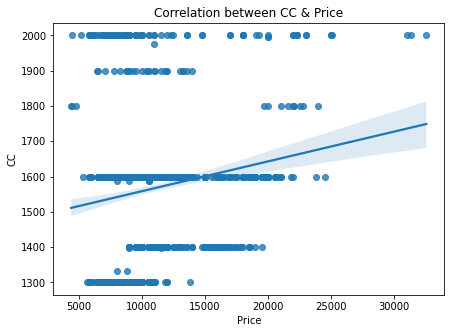

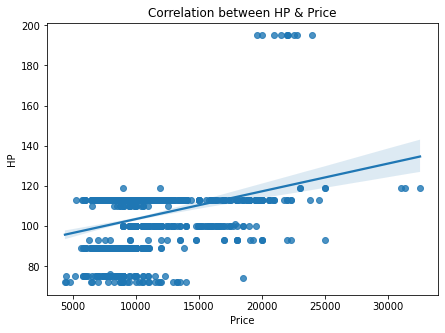

In [39]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between CC & Price')
sns.regplot(x='Price', y='CC', data=data )
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between HP & Price')
sns.regplot(x='Price', y='HP', data=data )

We just found out an Outlier & Cleaning it 

In [13]:
data.CC.max()   

16000

And it's should 1600

In [7]:
data.loc[(data['CC'] == 1600) ]
#data.CC.unique()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,...,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
7,18000,25,21718,0,113,1,Blue,0,1600,3,...,0,0,0,1,1,1,1,0,0,1
8,16800,25,25565,0,113,0,Grey,0,1600,3,...,1,1,1,1,1,1,0,0,0,0
9,17000,31,64361,0,113,1,Grey,0,1600,3,...,0,1,1,1,1,1,0,1,0,0
10,16000,31,67662,0,113,1,Blue,0,1600,3,...,0,1,1,1,1,1,0,1,0,1
11,17000,30,43907,0,113,0,Grey,1,1600,3,...,1,1,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,8800,80,39802,0,110,0,Green,1,1600,3,...,0,0,0,0,0,1,0,1,0,0
1351,8200,77,36539,0,113,0,Red,1,1600,4,...,0,0,0,0,0,0,0,0,0,0
1353,7650,79,36002,0,113,1,Blue,0,1600,3,...,0,0,0,1,1,1,0,0,1,0
1357,10000,79,30966,0,113,0,Silver,1,1600,3,...,0,0,0,0,0,1,0,0,0,1


In [8]:
data.iloc[[70],[8]] = 1600

Let's plot it again AGE & Price, it shows negative correlation between age & Price

<AxesSubplot: title={'center': 'Correlation between Age & Price'}, xlabel='Price', ylabel='Age'>

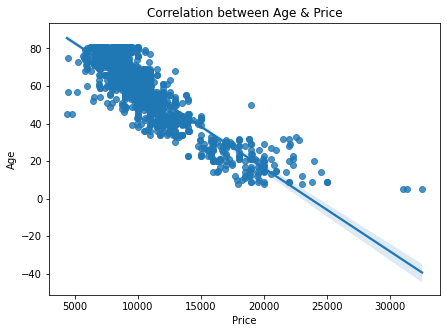

In [41]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Age & Price')
sns.regplot(x='Price', y='Age', data=data )

Now are preprating the data for regression model 

In [25]:
#X = data.iloc[:,1:]
X = data.drop(['Price'],axis=1)
y = data['Price']
print(X.shape)
print(y.shape)


(1367, 27)
(1367,)


Spliting datas for Train & Test
# X having all columns except the price 
# Y having the prices 

#we are spliting datas in train & test 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .1, random_state = 55)


In [27]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(137, 27)
(1230, 27)
(137,)
(1230,)


In [28]:
scaler = StandardScaler()

We scaling the values 

In [29]:
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Selecting the Linear Regression Model & Fitting into the model

In [30]:
model = LinearRegression()


In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Here we are checking out model performance by Mean absolute error, mean squared error and R squared error

In [34]:
print('MAE:', (metrics.mean_absolute_error(pred,y_test)))
print('MSE:', (metrics.mean_squared_error(pred,y_test)))
print('R2 score:', (metrics.r2_score(pred,y_test)))


MAE: 786.4509505046722
MSE: 1184599.4835632883
R2 score: 0.8918070591349443


Let's check out the acutal price & predicted price linear regression

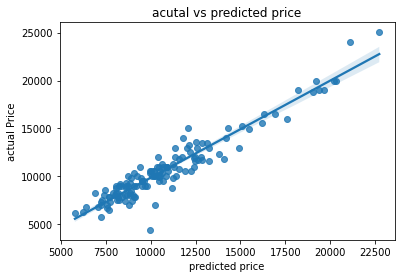

In [35]:
sns.regplot(x=pred, y=y_test)
plt.xlabel('predicted price')
plt.ylabel('actual Price')
plt.title('acutal vs predicted price')
plt.show()